# Simple example of Pressure-Deflection Diagram

In [1]:
%matplotlib notebook

from pygasflow.shockwave import (
    Pressure_Deflection,
    Pressure_Ratio
)

from pygasflow.solvers import Shockwave_Solver

import numpy as np
import matplotlib.pyplot as plt

This example illustrates a simple shock reflection process, and the Pressure-Deflection Diagram.

First, I need a function to find the index of the element, inside the pressure-deflection curve, corresponding to a given pressure ratio. There are more accurate (scientific) ways to find this point, but to make things quickly this approach is good enough, I only need to keep relatively N (see the code below) high.

In [2]:
def Find_Index(arr, val):    
    idx = np.where(arr <= val)[0]
    return idx[-1]

This function mirrors an array. It is useful to get a complete pressure-deflection plot.

In [3]:
def Mirror_Array(arr, opposite_sign=False):
    if opposite_sign:
        return np.append(arr, -arr[::-1])
    return np.append(arr, arr[::-1])

<IPython.core.display.Javascript object>


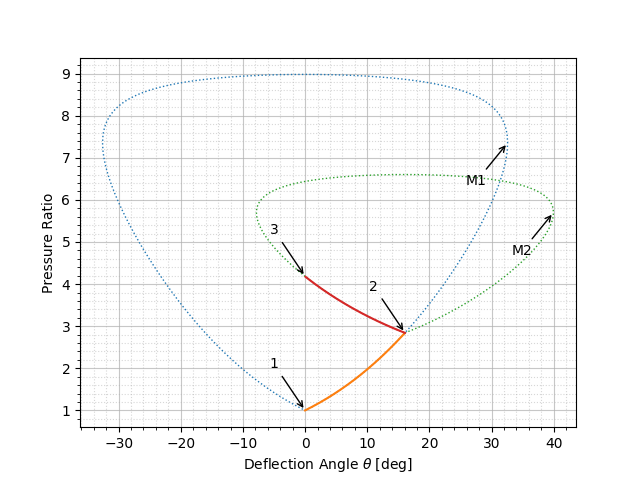

Text(0, 0.5, 'Pressure Ratio')

In [4]:
# Known data
M1 = 2.8
beta1 = 35
theta1 = 16
gamma = 1.4

# number of discretization point in [0, theta_max(M)]
N = 500

# first shock wave
s1 = Shockwave_Solver('m1', M1, 'beta', beta1)
M2 = s1[2]
p2_p1 = s1[6]

# reflected shock wave
s2 = Shockwave_Solver('m1', M2, 'theta', theta1)
p3_p2 = s2[6]

# compute the Pressure-Deflection curves. Note that it returns values
# computed for only positive deflection angles
theta_1, pr_1 = Pressure_Deflection(M1, gamma, N)
theta_2, pr_2 = Pressure_Deflection(M2, gamma, N)

# find the index of the point p2_p1 in the pr_1 curve.
idx = Find_Index(pr_1, p2_p1)

# this is the point corresponding to the downstream condition of 
# the first shock wave
offset = np.asarray([theta_1[idx], pr_1[idx] - 1])

# find the index in the theta_2 curve of the deflection coordinate
# corresponding to the where p2_p1 is. 
# We need this to plot the correct segment over the pr_2 curve.
idx2 = Find_Index(theta_2[0:int(len(theta_2)/2)], theta_1[idx])

# Mach 1 curve
plt.plot(Mirror_Array(theta_1, True), Mirror_Array(pr_1), ':', linewidth=1)

plt.annotate("M1", 
    (theta_1[N], pr_1[N]),
    (theta_1[N] - 5, pr_1[N] - 1),
    horizontalalignment='center',
    arrowprops=dict(arrowstyle = "->")
)

plt.plot(theta_1[0:idx],pr_1[0:idx])

# Mach 2 curve
plt.plot(offset[0] + Mirror_Array(theta_2, True), offset[1] + Mirror_Array(pr_2), ':', linewidth=1)

plt.annotate("M2", 
    (offset[0] + theta_2[N], offset[1] + pr_2[N]),
    (offset[0] + theta_2[N] - 5, offset[1] + pr_2[N] - 1),
    horizontalalignment='center',
    arrowprops=dict(arrowstyle = "->")
)

plt.plot(offset[0] - theta_2[0:idx2], offset[1] + pr_2[0:idx2])

# flow states

plt.annotate("1", 
    (theta_1[0], pr_1[0]),
    (theta_1[0] - 5, pr_1[0] + 1),
    horizontalalignment='center',
    arrowprops=dict(arrowstyle = "->")
)

plt.annotate("2", 
    (theta_1[idx], pr_1[idx]),
    (theta_1[idx] - 5, pr_1[idx] + 1),
    horizontalalignment='center',
    arrowprops=dict(arrowstyle = "->")
)

plt.annotate("3", 
    (offset[0] - theta_2[idx2], offset[1] + pr_2[idx2]),
    (offset[0] - theta_2[idx2] - 5, offset[1] + pr_2[idx2] + 1),
    horizontalalignment='center',
    arrowprops=dict(arrowstyle = "->")
)

plt.minorticks_on()
plt.grid(which='major', linestyle='-', alpha=0.7)
plt.grid(which='minor', linestyle=':', alpha=0.5)
plt.xlabel(r"Deflection Angle $\theta$ [deg]")
plt.ylabel("Pressure Ratio")